<a href="https://colab.research.google.com/github/blessondensil294/Novartis-Data-Science-Competition/blob/master/Novartis_Data_Science_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Novartis Data Science Hiring challenge

To Predict if the server will be hacked or not

## Load the data from Github

In [0]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/Novartis-Data-Science-Competition/master/Data/Test.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/Novartis-Data-Science-Competition/master/Data/Train.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [3]:
df_Train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [31]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18814 entries, 0 to 23854
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_1               18814 non-null  int64  
 1   X_2               18814 non-null  int64  
 2   X_3               18814 non-null  int64  
 3   X_4               18814 non-null  int64  
 4   X_5               18814 non-null  int64  
 5   X_6               18814 non-null  int64  
 6   X_7               18814 non-null  int64  
 7   X_8               18814 non-null  int64  
 8   X_9               18814 non-null  int64  
 9   X_10              18814 non-null  int64  
 10  X_11              18814 non-null  int64  
 11  X_12              18814 non-null  float64
 12  X_13              18814 non-null  int64  
 13  X_14              18814 non-null  int64  
 14  X_15              18814 non-null  int64  
 15  MULTIPLE_OFFENSE  18814 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 2

In [5]:
df_Train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
df_Train.shape

(23856, 18)

In [7]:
df_Test.shape

(15903, 17)

In [8]:
df_Train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [9]:
df_Test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [10]:
df_Train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [11]:
df_Train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

## Feature Engineering

### Remove Duplicate Rows

In [15]:
df_Train.shape

(23856, 18)

In [0]:
df_Train = df_Train.drop(['INCIDENT_ID', 'DATE'], axis=1)

In [17]:
df_Train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [0]:
df_Train.drop_duplicates(keep='first', inplace=True)

In [19]:
df_Train.shape

(18814, 16)

In [20]:
df_Train['MULTIPLE_OFFENSE'].value_counts()

1    17836
0      978
Name: MULTIPLE_OFFENSE, dtype: int64

In [21]:
df_Train.isnull().sum()

X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                141
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

### Fill Missing Values

In [0]:
df_Train['X_12'] = df_Train['X_12'].ffill()
df_Test['X_12'] = df_Test['X_12'].ffill()
df_Train['X_12'] = df_Train['X_12'].bfill()
df_Test['X_12'] = df_Test['X_12'].bfill()

In [0]:
#Convert to integer
df_Train['X_12'] = df_Train['X_12'].astype(int)
df_Test['X_12'] = df_Test['X_12'].astype(int)

## Feature Selection

### Correlation of Data

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


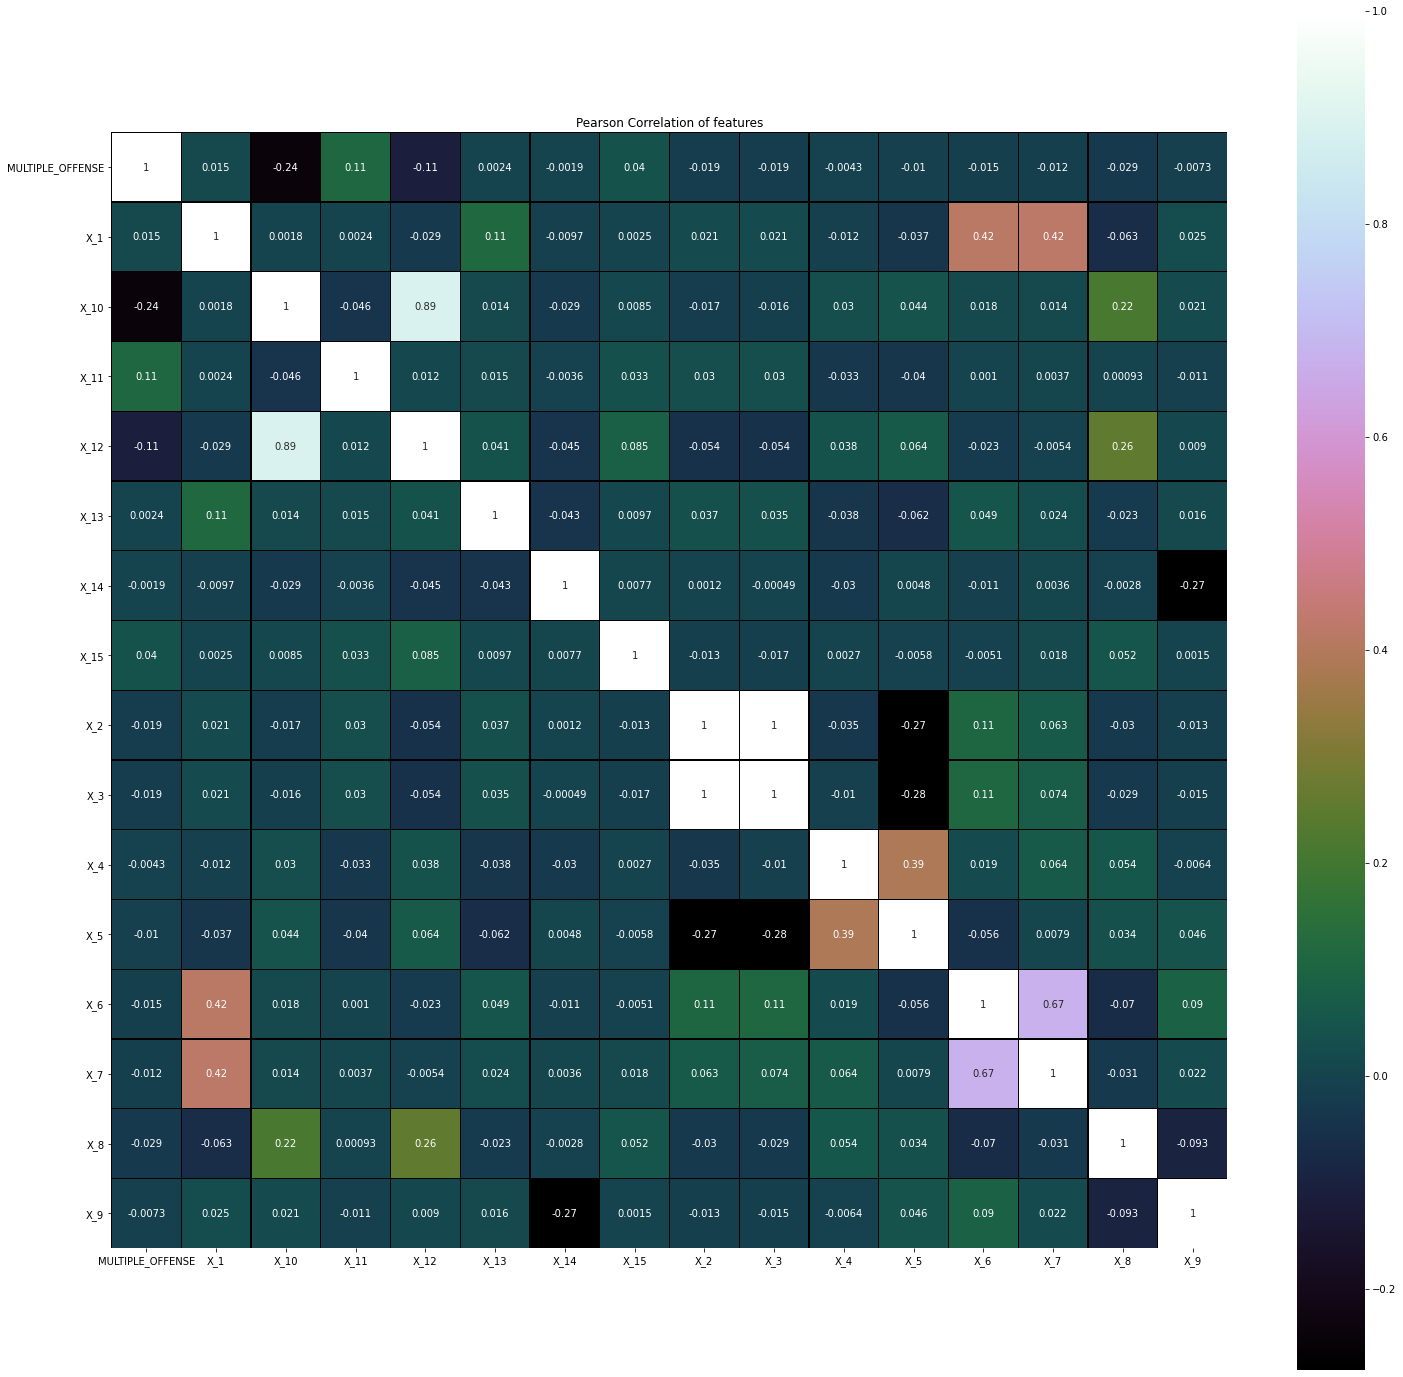

In [56]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_Train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [57]:
df_Train.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.020915,0.020678,-0.011969,-0.036969,0.415254,0.419761,-0.063110,0.024894,0.001782,0.002431,-0.028958,0.113617,-0.009718,0.002470,0.014948
X_2,0.020915,1.000000,0.997183,-0.034701,-0.273796,0.106539,0.063355,-0.030287,-0.013057,-0.017373,0.030416,-0.053886,0.036968,0.001156,-0.012961,-0.018676
X_3,0.020678,0.997183,1.000000,-0.010006,-0.276232,0.110816,0.073723,-0.028750,-0.014570,-0.016438,0.029520,-0.053619,0.035184,-0.000493,-0.016719,-0.018770
X_4,-0.011969,-0.034701,-0.010006,1.000000,0.390439,0.018748,0.063802,0.054493,-0.006397,0.030263,-0.033334,0.038373,-0.038341,-0.030230,0.002711,-0.004253
X_5,-0.036969,-0.273796,-0.276232,0.390439,1.000000,-0.055987,0.007925,0.034433,0.046320,0.044109,-0.040316,0.063665,-0.061932,0.004751,-0.005812,-0.010082
X_6,0.415254,0.106539,0.110816,0.018748,-0.055987,1.000000,0.673273,-0.070119,0.089650,0.017857,0.001035,-0.022657,0.049451,-0.010615,-0.005076,-0.015254
X_7,0.419761,0.063355,0.073723,0.063802,0.007925,0.673273,1.000000,-0.030933,0.021767,0.014279,0.003719,-0.005375,0.024217,0.003617,0.017528,-0.012324
X_8,-0.063110,-0.030287,-0.028750,0.054493,0.034433,-0.070119,-0.030933,1.000000,-0.093292,0.215793,0.000934,0.255208,-0.023318,-0.002788,0.051776,-0.029485
X_9,0.024894,-0.013057,-0.014570,-0.006397,0.046320,0.089650,0.021767,-0.093292,1.000000,0.020867,-0.011426,0.008988,0.016483,-0.272443,0.001514,-0.007291
X_10,0.001782,-0.017373,-0.016438,0.030263,0.044109,0.017857,0.014279,0.215793,0.020867,1.000000,-0.046466,0.890416,0.013661,-0.028526,0.008544,-0.242552


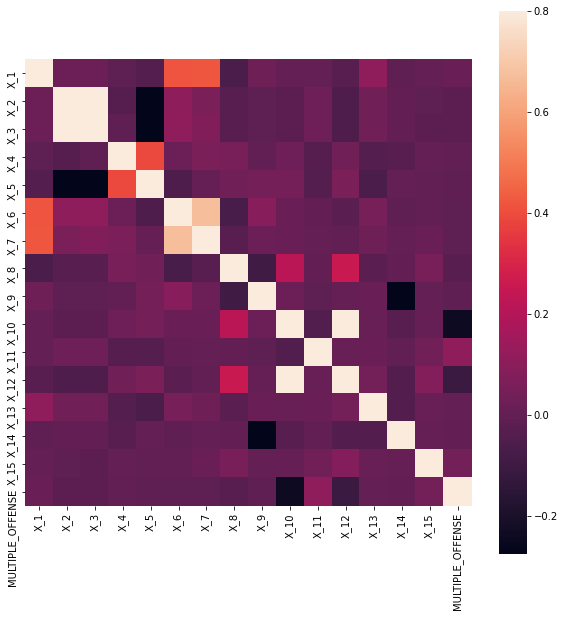

In [58]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

### Multi Colinearity of the Data

In [0]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
df_multi = df_Train
df_multi = df_multi.drop('MULTIPLE_OFFENSE', axis=1)

In [0]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

In [62]:
vif.round(1)

,VIF Factor,features
0,1.4,X_1
1,743.4,X_2
2,750.3,X_3
3,4.3,X_4
4,3.5,X_5
5,6.0,X_6
6,5.3,X_7
7,1.6,X_8
8,10.1,X_9
9,10.3,X_10


# Data Modelling for Prediction

## Split the Data to x variable and y variable

In [0]:
x = df_Train
x = x.drop(['MULTIPLE_OFFENSE'], axis=1)
y = df_Train['MULTIPLE_OFFENSE']
x_pred = df_Test
x_pred = x_pred.drop(['INCIDENT_ID', 'DATE'], axis=1)

## Balancing the Data

In [50]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')
x_sm, y_sm = sm.fit_resample(x,y)
x_sm = pd.DataFrame(x_sm)
x_sm.columns = x.columns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Random Forest Model Classification

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1, random_state=294)

In [52]:
rf.fit(x_sm,np.ravel(y_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=294, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rf.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission RF v1.csv', index=False)

## CatBoost

In [63]:
pip install catboost

     |████████████████████████████████| 64.8MB 64kB/s 


In [0]:
from catboost import CatBoostClassifier
cb_cl = CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.70, max_depth=5, scale_pos_weight=2.5)

In [65]:
cb_cl.fit(x_sm,np.ravel(y_sm))

0:	learn: 0.4490265	total: 66.4ms	remaining: 33.1s
1:	learn: 0.3073741	total: 83.3ms	remaining: 20.8s
2:	learn: 0.2393800	total: 100ms	remaining: 16.6s
3:	learn: 0.1867440	total: 117ms	remaining: 14.5s
4:	learn: 0.1463068	total: 133ms	remaining: 13.2s
5:	learn: 0.1242704	total: 149ms	remaining: 12.3s
6:	learn: 0.1104817	total: 166ms	remaining: 11.7s
7:	learn: 0.0996248	total: 183ms	remaining: 11.3s
8:	learn: 0.0888554	total: 199ms	remaining: 10.9s
9:	learn: 0.0778186	total: 215ms	remaining: 10.6s
10:	learn: 0.0726635	total: 231ms	remaining: 10.3s
11:	learn: 0.0680138	total: 246ms	remaining: 10s
12:	learn: 0.0630556	total: 273ms	remaining: 10.2s
13:	learn: 0.0581046	total: 289ms	remaining: 10s
14:	learn: 0.0562968	total: 305ms	remaining: 9.88s
15:	learn: 0.0523811	total: 322ms	remaining: 9.74s
16:	learn: 0.0486876	total: 338ms	remaining: 9.6s
17:	learn: 0.0455036	total: 354ms	remaining: 9.48s
18:	learn: 0.0439882	total: 370ms	remaining: 9.36s
19:	learn: 0.0415897	total: 386ms	remaining:

In [0]:
y_pred = cb_cl.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission CB v1.csv', index=False)